# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [36]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
BANKS,"In December 2020, a mid-sized private life ins...",BANKS CHARGE
BUDGET,Removal of tax exemptions under Section 80C i...,BUDGET 2020
CAPITAL,The capital raising committee of HDFC Life Ins...,CAPITAL RAISING
FLIPKART,"Flipkart, an e-commerce firm, announced the la...",COVID LOCKDOWN
HDFC,Private life insurer HDFC Life Insurance poste...,FLIPKART
LOCKDOWN,The nationwide lockdown due to the coronavirus...,HDFC BANK
MICROSOFT,Microsoft has announced that it is opening an ...,HOT STOCKS
PLUTO,"Some 94 years ago on February 18, 1930, Americ...",MICROSOFT
POKEMON,In a creative effort to inform others about to...,PLUTO PLANET
SOLAR,A total solar eclipse is poised to adorn the s...,POKEMON


In [37]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
BANKS,"In December 2020, a mid-sized private life ins...",BANKS CHARGE,0.018222,0.463643
BUDGET,Removal of tax exemptions under Section 80C i...,BUDGET 2020,0.121383,0.427298
CAPITAL,The capital raising committee of HDFC Life Ins...,CAPITAL RAISING,0.015123,0.305247
FLIPKART,"Flipkart, an e-commerce firm, announced the la...",COVID LOCKDOWN,0.039583,0.419444
HDFC,Private life insurer HDFC Life Insurance poste...,FLIPKART,0.049738,0.395025
LOCKDOWN,The nationwide lockdown due to the coronavirus...,HDFC BANK,0.040712,0.446550
MICROSOFT,Microsoft has announced that it is opening an ...,HOT STOCKS,0.320076,0.528030
PLUTO,"Some 94 years ago on February 18, 1930, Americ...",MICROSOFT,0.021121,0.417515
POKEMON,In a creative effort to inform others about to...,PLUTO PLANET,0.098333,0.585417
SOLAR,A total solar eclipse is poised to adorn the s...,POKEMON,0.150901,0.497973


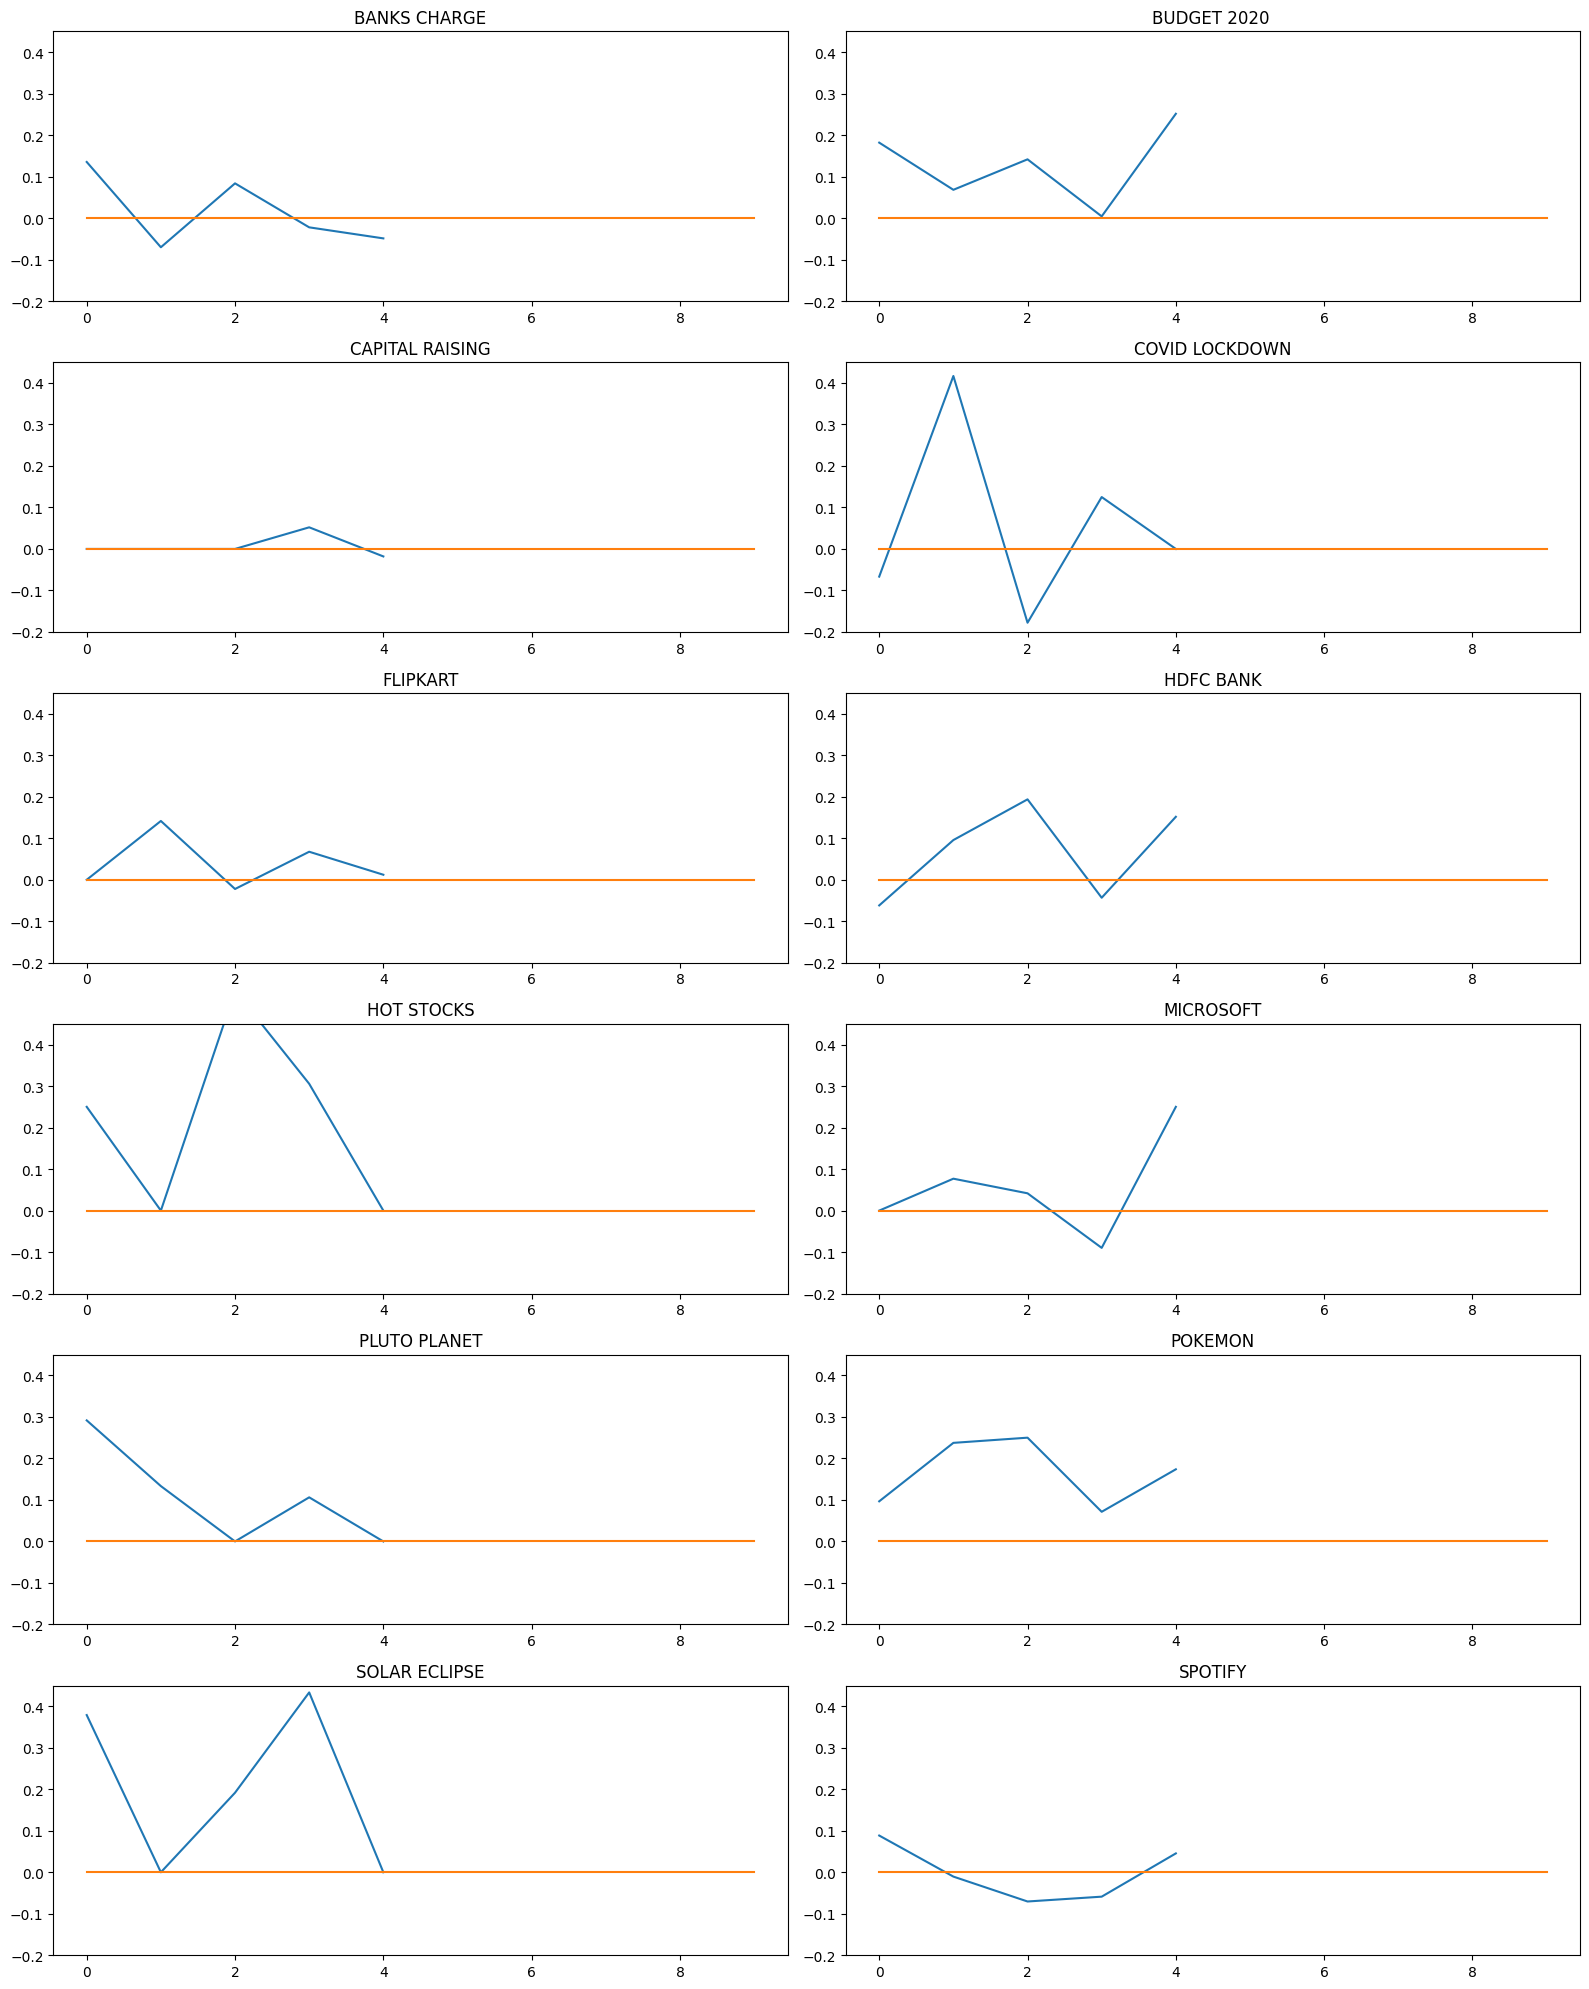

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 20]

# Determine the number of rows and columns dynamically based on the number of comedians
num_comedians = len(data.index)
num_rows = (num_comedians + 1) // 2
num_cols = 2

for index, comedian in enumerate(data.index):
    plt.subplot(num_rows, num_cols, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.45)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [39]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [40]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
BANKS,"In December 2020, a mid-sized private life ins...",BANKS CHARGE,0.018222,0.463643
BUDGET,Removal of tax exemptions under Section 80C i...,BUDGET 2020,0.121383,0.427298
CAPITAL,The capital raising committee of HDFC Life Ins...,CAPITAL RAISING,0.015123,0.305247
FLIPKART,"Flipkart, an e-commerce firm, announced the la...",COVID LOCKDOWN,0.039583,0.419444
HDFC,Private life insurer HDFC Life Insurance poste...,FLIPKART,0.049738,0.395025
LOCKDOWN,The nationwide lockdown due to the coronavirus...,HDFC BANK,0.040712,0.446550
MICROSOFT,Microsoft has announced that it is opening an ...,HOT STOCKS,0.320076,0.528030
PLUTO,"Some 94 years ago on February 18, 1930, Americ...",MICROSOFT,0.021121,0.417515
POKEMON,In a creative effort to inform others about to...,PLUTO PLANET,0.098333,0.585417
SOLAR,A total solar eclipse is poised to adorn the s...,POKEMON,0.150901,0.497973


In [41]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['In December 2020, a mid-sized private life insurance CEO found out that their bank partner, a South India-based private lender, was in talks with a rival firm for a possible tie-up. It was a problem because the insurance company got half of it',
  "s revenues from the bank. The CEO acted swiftly and met the top management of the bank to thwart a break-up. He was successful and after three meetings the bank agreed to stay 'exclusive'. The CEO is not the only top executive worried about hi",
  "s insurance company's dependence on a bank. Bank-led insurers including ICICI Prudential Life Insurance, HDFC Life Insurance, Max Life Insurance, PNB MetLife and SBI Life Insurance are among companies that have significant business coming in f",
  'rom one bank. Take Max Life for instance. A total of 55 percent of its individual premiums came in from Axis Bank which is its partner. Or PNB Metlife where Punjab National Bank accounted for 53 percent of the individual business in FY19. For ',
  'A

In [42]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [43]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

20

In [44]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.07333333333333333,
  0.4375,
  0.375,
  0.0,
  0.0,
  -0.12291666666666666,
  0.0,
  0.0,
  -0.09999999999999999,
  0.20000000000000004,
  0.1898989898989899,
  0.0,
  0.10227272727272727,
  -0.1552272727272727,
  -0.08333333333333333,
  0.03409090909090909,
  -0.26666666666666666,
  0.0625,
  0.016666666666666666,
  0.1],
 [0.13636363636363635,
  0.11818181818181818,
  0.13636363636363635,
  0.4,
  0.0,
  0.06818181818181818,
  0.04545454545454545,
  0.13636363636363635,
  0.09318181818181817,
  0.0,
  0.6,
  0.08,
  0.014436026936026922,
  0.11481481481481481,
  -0.11666666666666665,
  0.0,
  0.17532467532467533,
  0.13636363636363635,
  0.3181818181818182,
  0.3181818181818182],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  -0.14583333333333331,
  0.0,
  0.0,
  0.0,
  0.125,
  0.0,
  -0.16111111111111112],
 [-0.2,
  0.0,
  0.0,
  0.0,
  0.4,
  0.4333333333333333,
  0.0,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.125,
  0

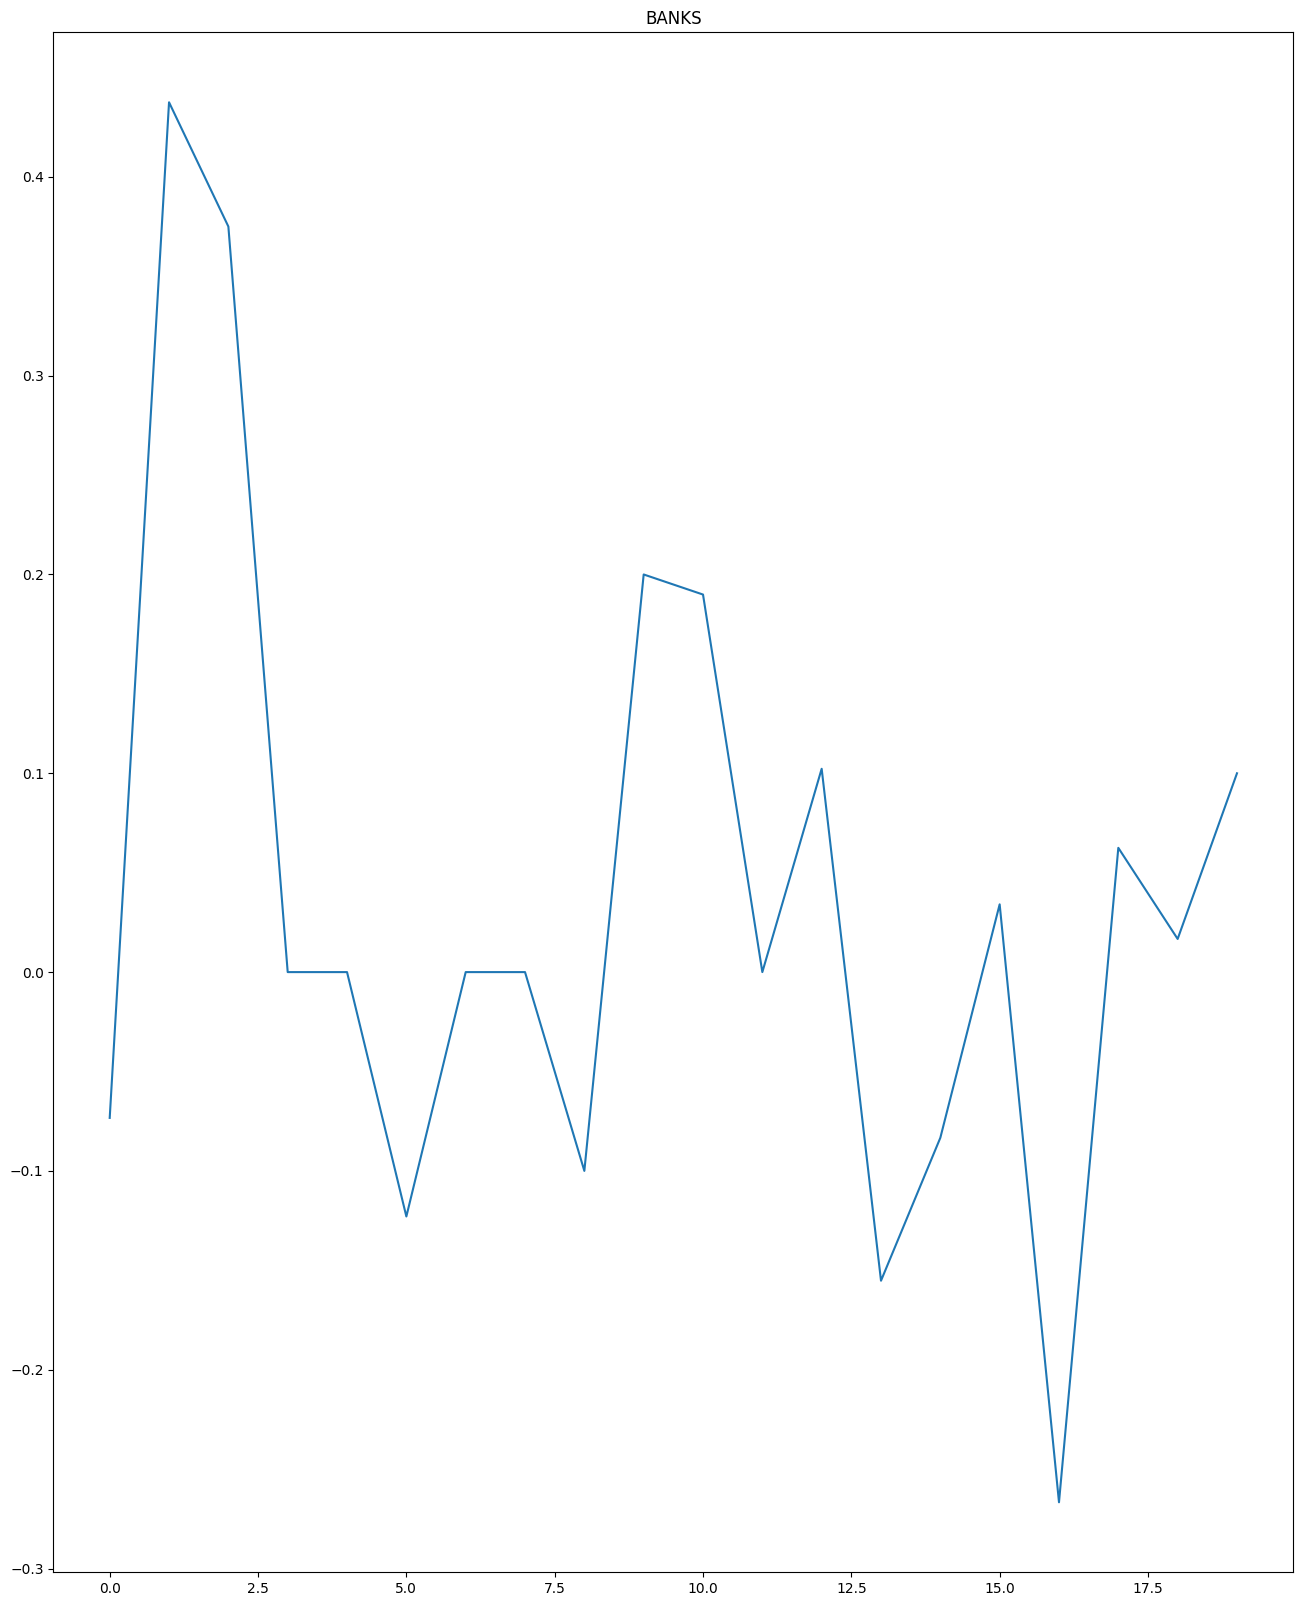

In [45]:

plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

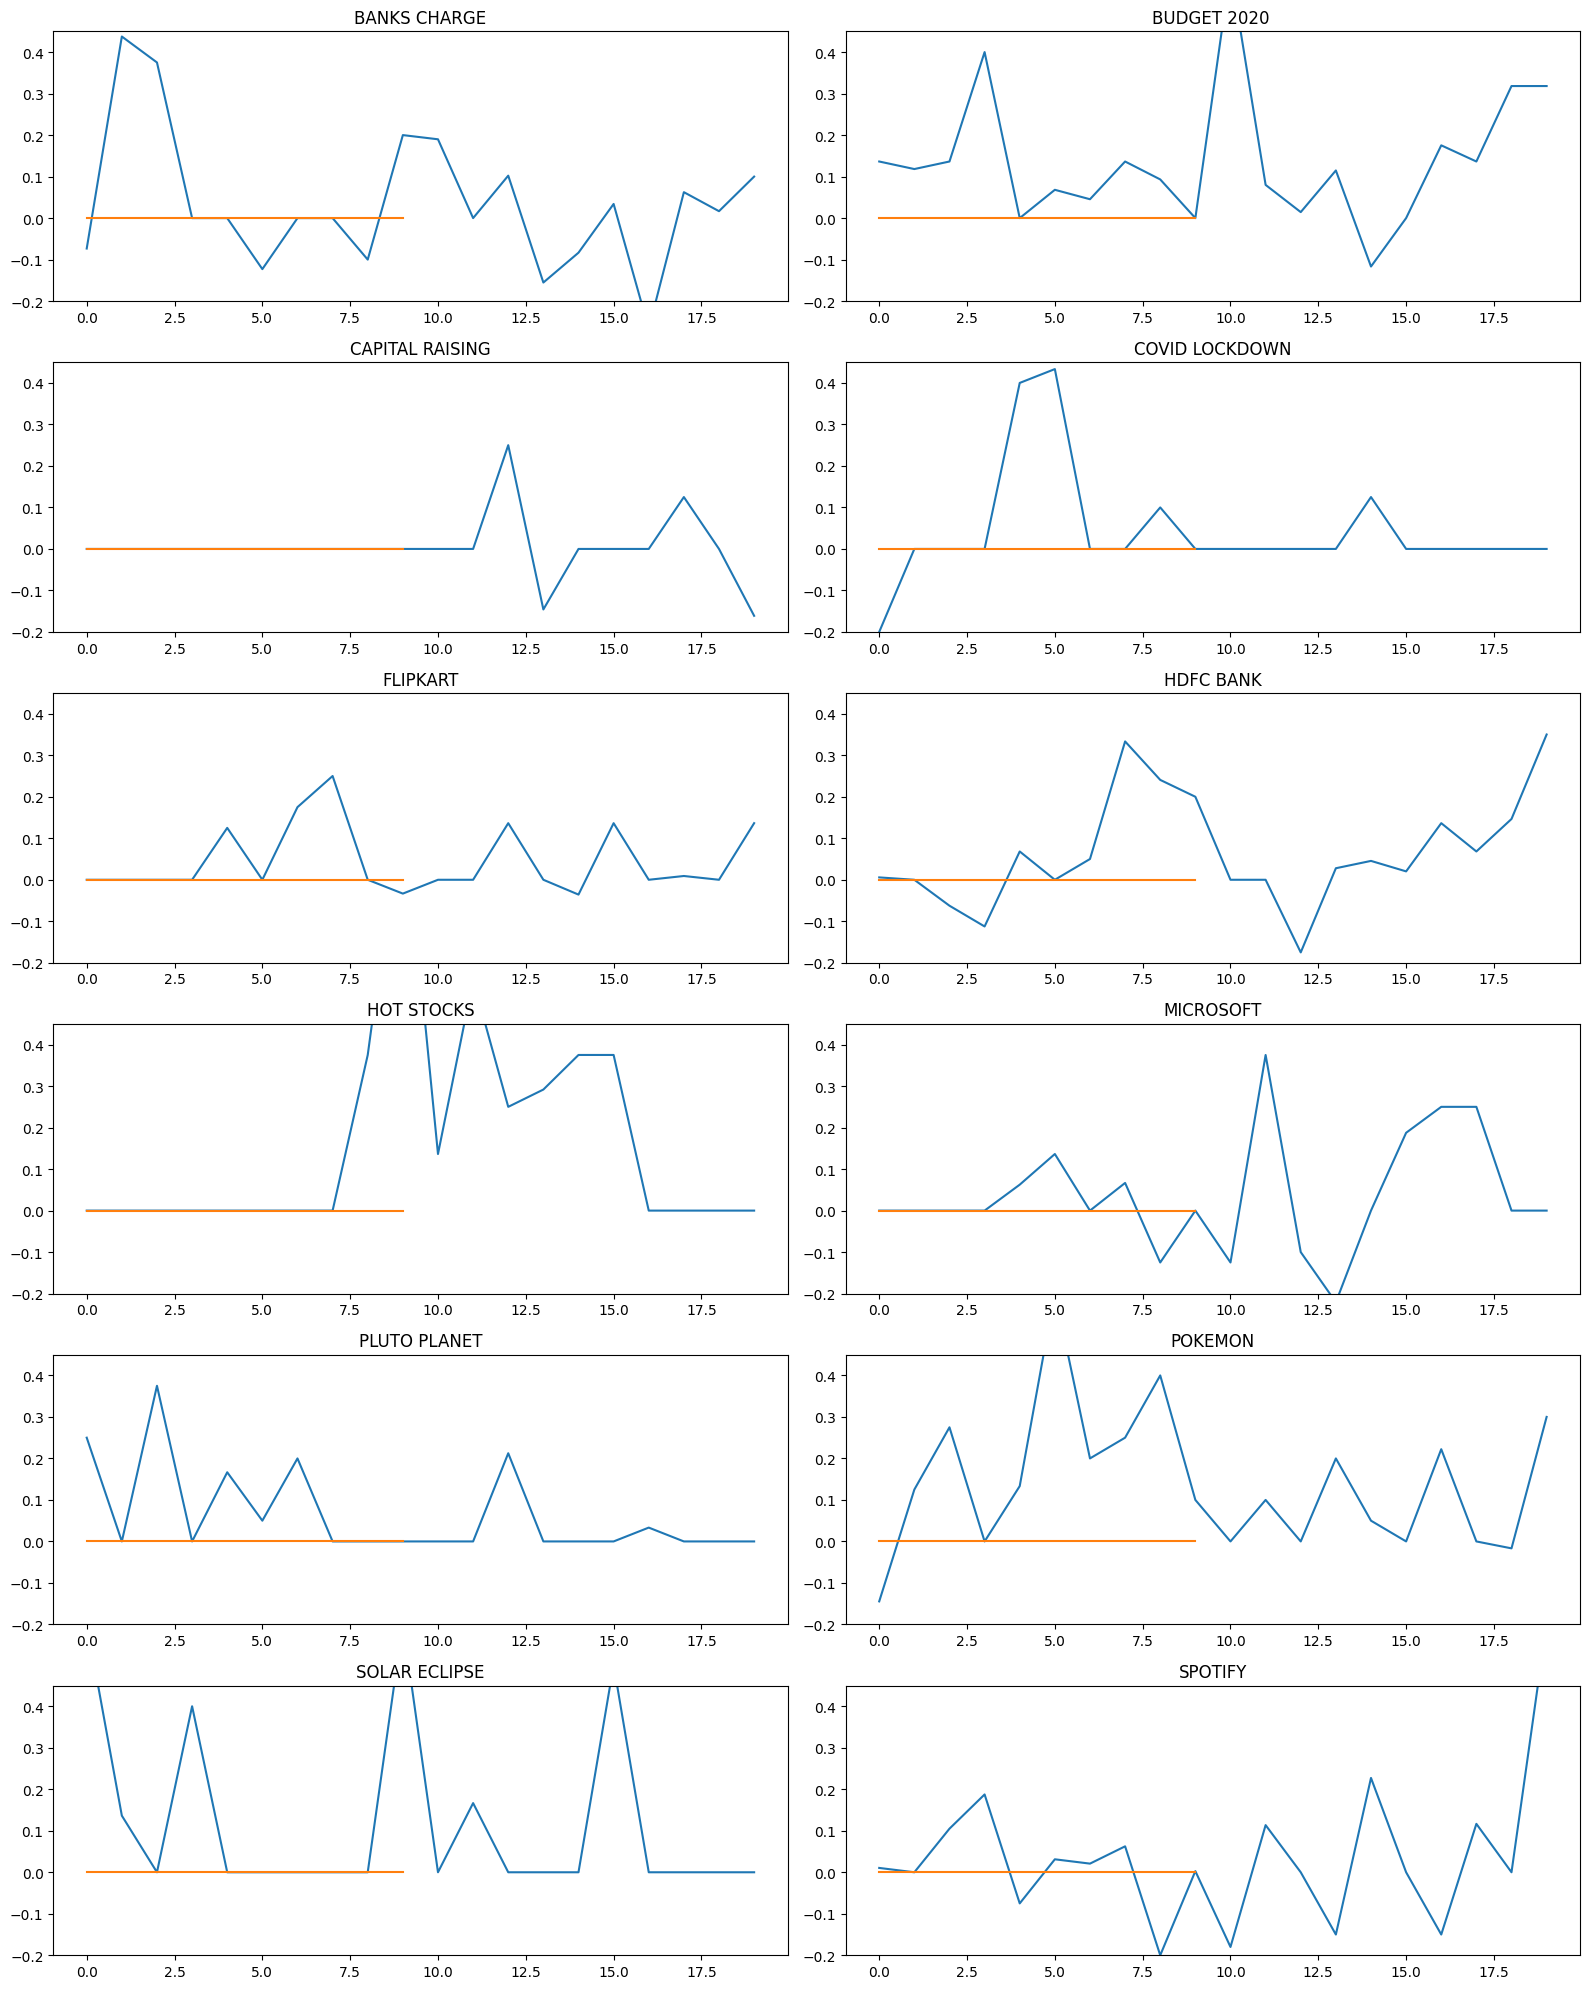

In [46]:
plt.rcParams['figure.figsize'] = [16, 20]

# Determine the number of rows and columns dynamically based on the number of comedians
num_comedians = len(data.index)
num_rows = (num_comedians + 1) // 2
num_cols = 2

for index, comedian in enumerate(data.index):
    plt.subplot(num_rows, num_cols, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.45)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [47]:
#q1 classififcation of series episodes on the basis of polarity and subjectivity

import pprint

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

list_pieces
# Calculate polarity and subjectivity for each episode routine
polarity_transcript_new = []
subjectivity_transcript_new = []

for pieces in list_pieces:
    polarities = [pol(piece) for piece in pieces]
    subjectivities = [sub(piece) for piece in pieces]

    polarity_transcript_new.append(polarities)
    subjectivity_transcript_new.append(subjectivities)

# Calculate average polarity and subjectivity for each series
avg_polarity = [np.mean(polarities) for polarities in polarity_transcript_new]
avg_subjectivity = [np.mean(subjectivities) for subjectivities in subjectivity_transcript_new]

# Classify series based on average polarity
new_polarity_class = ['positive' if polarity > 0 else ('negative' if polarity < 0 else 'neutral') for polarity in avg_polarity]

# Classify series based on average subjectivity
new_subjectivity_class = ['objective' if subjectivity > 0.5 else 'subjective' for subjectivity in avg_subjectivity]

# Update the DataFrame with polarity and subjectivity classifications
data['avg_polarity'] = avg_polarity
data['avg_subjectivity'] = avg_subjectivity

data['new_polarity_class'] = new_polarity_class
data['new_subjectivity_class'] = new_subjectivity_class

# Display the updated DataFrame
pprint.pprint(data)

                                                  transcript        full_name  \
BANKS      In December 2020, a mid-sized private life ins...     BANKS CHARGE   
BUDGET      Removal of tax exemptions under Section 80C i...     BUDGET 2020    
CAPITAL    The capital raising committee of HDFC Life Ins...  CAPITAL RAISING   
FLIPKART   Flipkart, an e-commerce firm, announced the la...   COVID LOCKDOWN   
HDFC       Private life insurer HDFC Life Insurance poste...         FLIPKART   
LOCKDOWN   The nationwide lockdown due to the coronavirus...        HDFC BANK   
MICROSOFT  Microsoft has announced that it is opening an ...       HOT STOCKS   
PLUTO      Some 94 years ago on February 18, 1930, Americ...        MICROSOFT   
POKEMON    In a creative effort to inform others about to...     PLUTO PLANET   
SOLAR      A total solar eclipse is poised to adorn the s...          POKEMON   
SPOTIFY    Popular music streaming platform Spotify has a...    SOLAR ECLIPSE   
STOCKS     Rohan Patil After

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [48]:
def split_text(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces


[['In December 2020, a mid-sized private life insurance CEO found out that their bank partner, a South India-based private lender, was in talks with a rival firm for a possible tie-up. It was a problem because the insurance company got half of its revenues from the bank. The CEO acted swiftly and met the top management of the',
  " bank to thwart a break-up. He was successful and after three meetings the bank agreed to stay 'exclusive'. The CEO is not the only top executive worried about his insurance company's dependence on a bank. Bank-led insurers including ICICI Prudential Life Insurance, HDFC Life Insurance, Max Life Insurance, PNB MetLife and ",
  'SBI Life Insurance are among companies that have significant business coming in from one bank. Take Max Life for instance. A total of 55 percent of its individual premiums came in from Axis Bank which is its partner. Or PNB Metlife where Punjab National Bank accounted for 53 percent of the individual business in FY19. For ',
  "Aditya 

In [49]:

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript



[[0.022222222222222216,
  0.4166666666666667,
  0.09375,
  -0.07291666666666666,
  -0.2,
  0.0,
  -0.09999999999999999,
  0.19393939393939394,
  0.0,
  -0.01266233766233764,
  -0.1875,
  0.022727272727272724,
  -0.26666666666666666,
  0.046875,
  0.018750000000000003],
 [0.13636363636363635,
  0.11818181818181818,
  0.2681818181818182,
  0.13636363636363635,
  0.06818181818181818,
  0.04545454545454545,
  0.09318181818181817,
  0.3,
  0.08,
  0.010827020202020192,
  0.14814814814814814,
  -0.225,
  0.17532467532467533,
  0.25757575757575757,
  0.3181818181818182],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  -0.125,
  0.0,
  0.25,
  0.0,
  -0.16111111111111112],
 [-0.2,
  0.0,
  0.25,
  0.41666666666666663,
  0.0,
  0.0,
  0.1,
  0.16666666666666666,
  0.0,
  -0.8,
  0.1875,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.08333333333333333,
  0.4,
  0.1,
  0.1,
  -0.16666666666666666,
  0.0,
  0.13636363636363635,
  -0.03571428571428571,
  0.1363636363

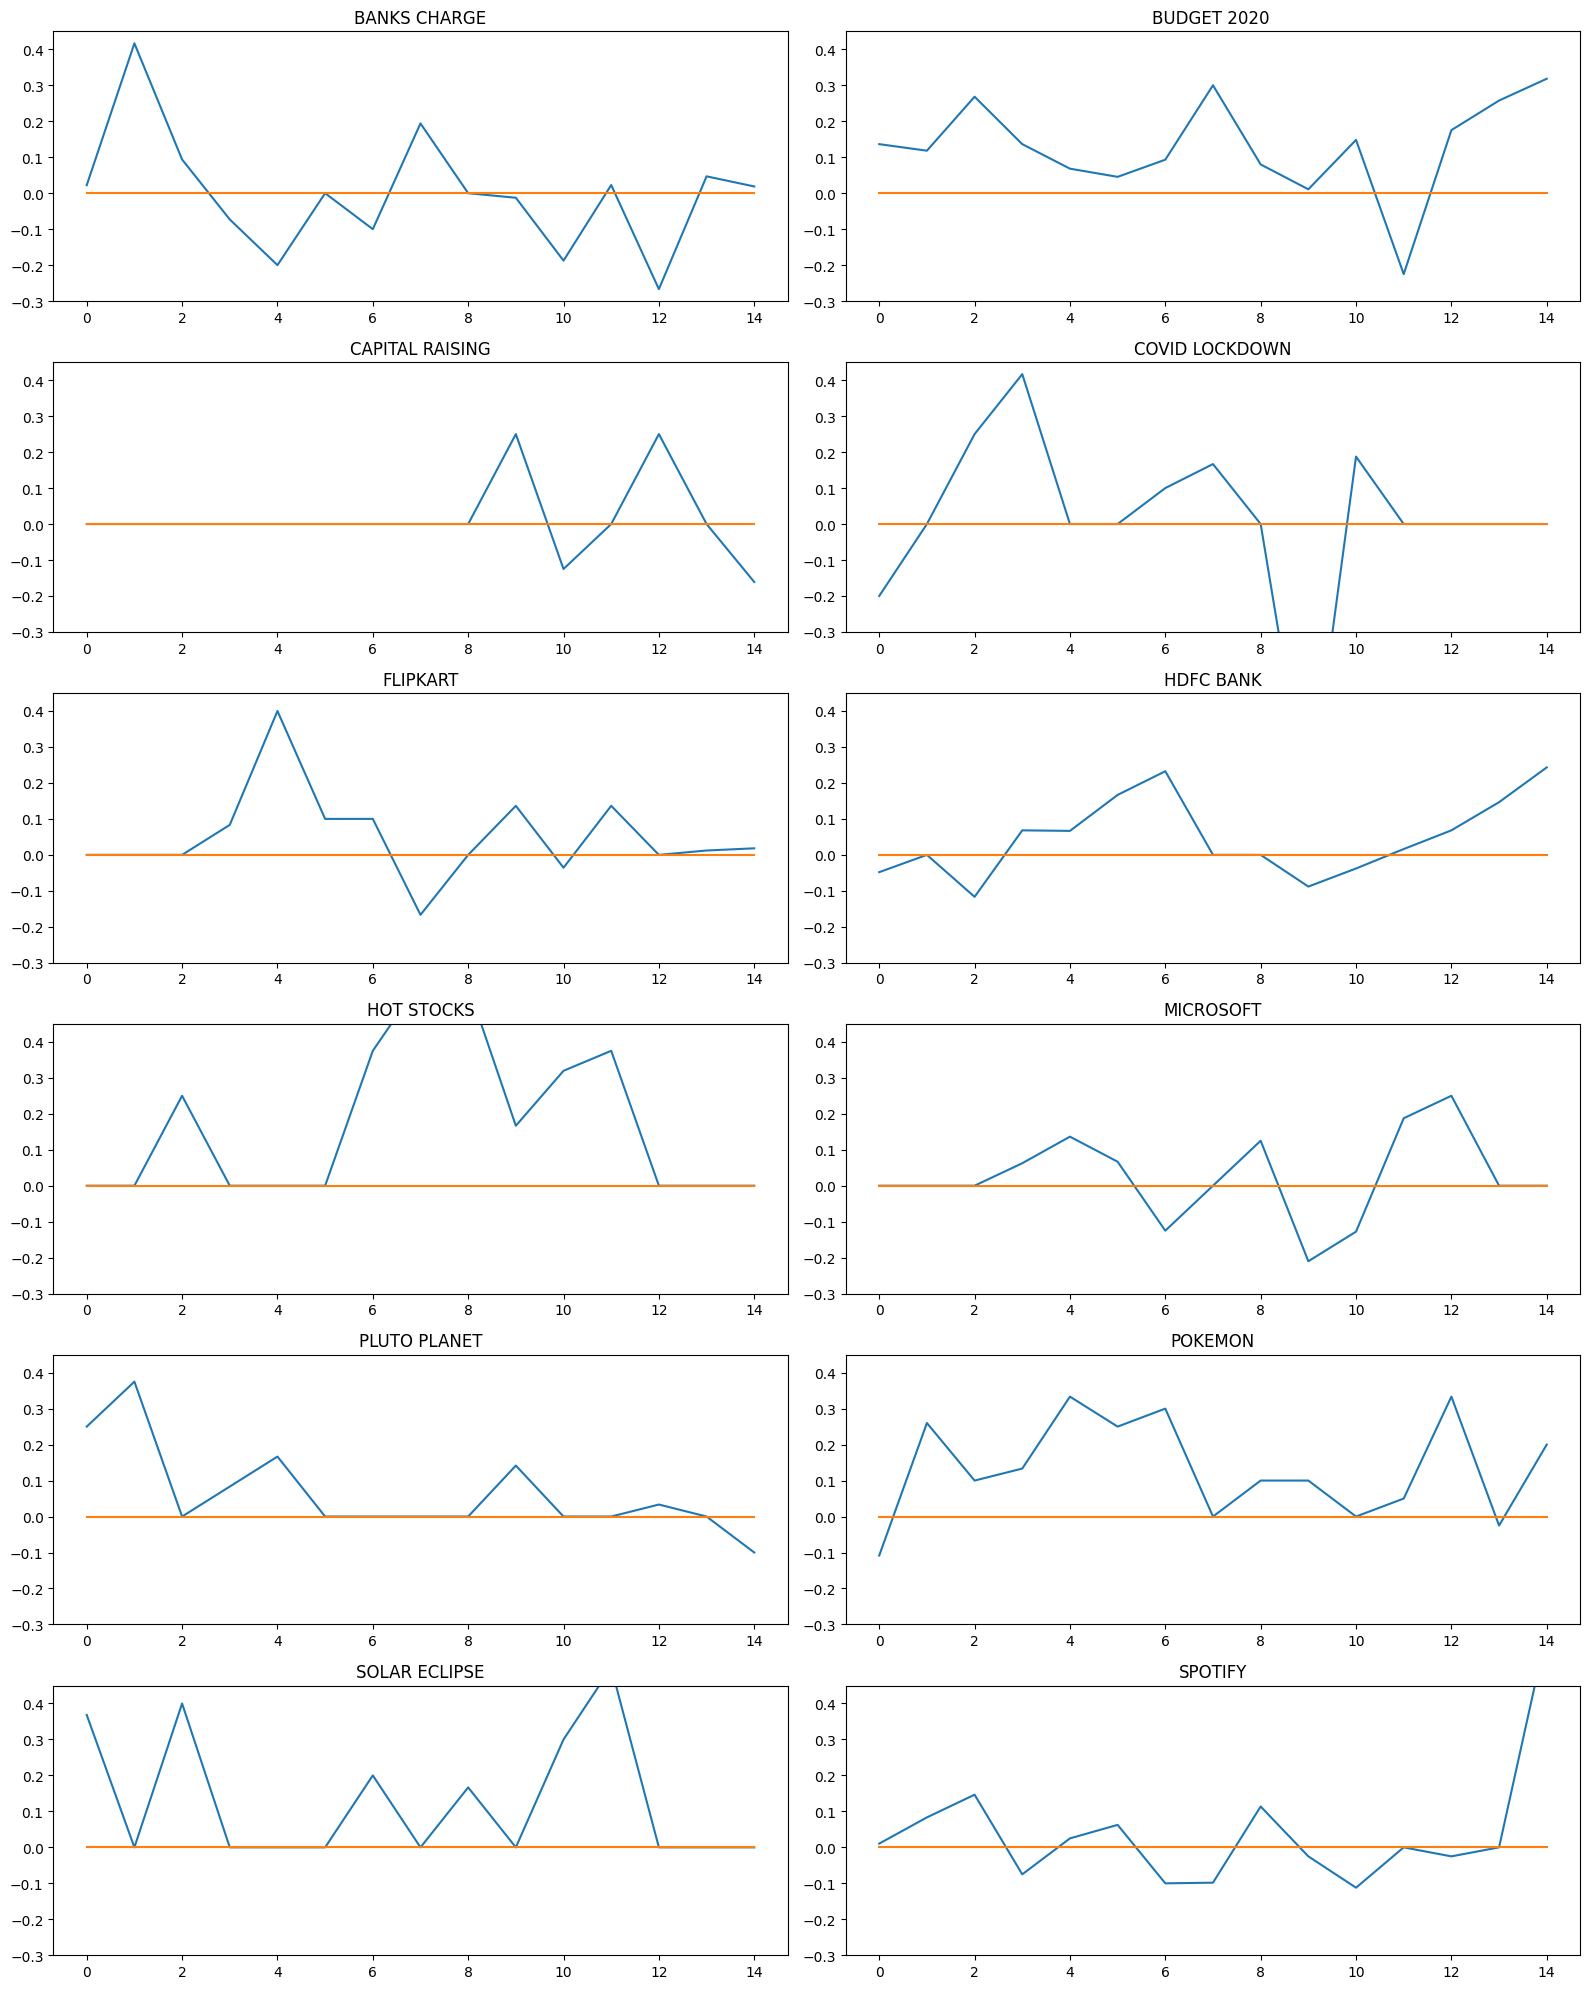

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 20]

# Determine the number of rows and columns dynamically based on the number of comedians
num_comedians = len(data.index)
num_rows = (num_comedians + 1) // 2
num_cols = 2

for index, comedian in enumerate(data.index):
    plt.subplot(num_rows, num_cols, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-0.3, ymax=0.45)  # Adjusted the y-axis limits

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


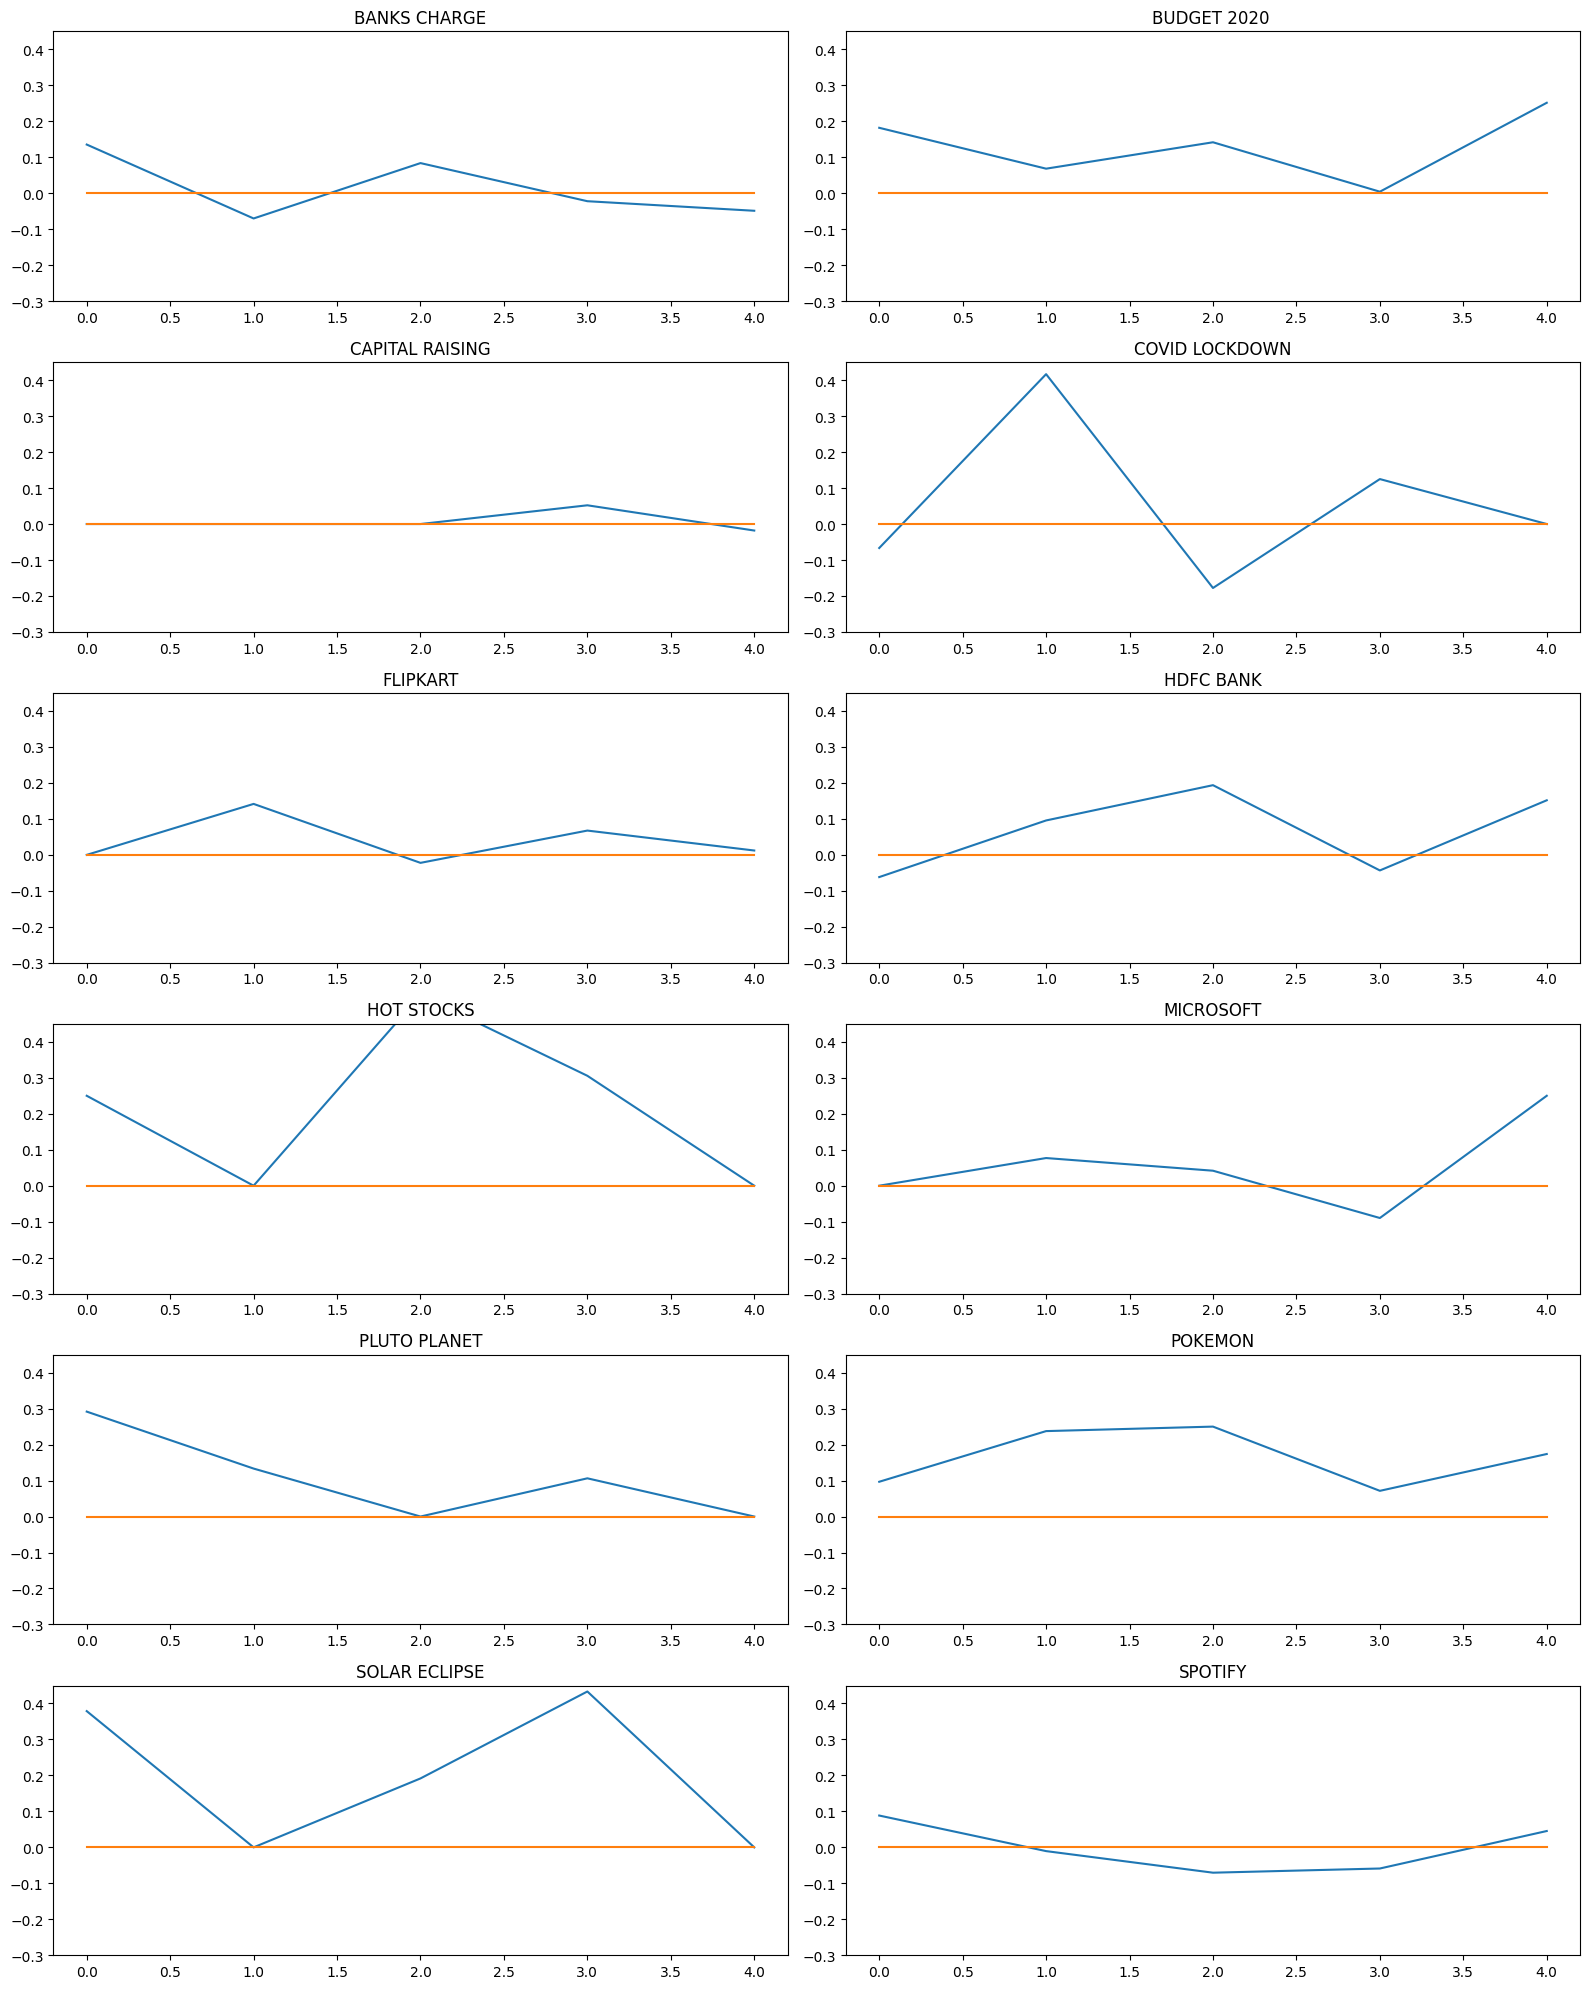

In [51]:
#Q2
def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 5 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

plt.rcParams['figure.figsize'] = [16, 20]

# Determine the number of rows and columns dynamically based on the number of comedians
num_comedians = len(data.index)
num_rows = (num_comedians + 1) // 2  # Add 1 to ensure at least one row if num_comedians == 1
num_cols = 2

for index, comedian in enumerate(data.index):
    plt.subplot(num_rows, num_cols, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,5), np.zeros(5))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-0.3, ymax=0.45)  # Adjusted the y-axis limits

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()